In [56]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 as cv
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [2]:
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


#**Data Analysis**

In [3]:
print(xtrain.shape, ytrain.shape)

(60000, 28, 28) (60000,)


In [4]:
print(ytest.shape)

(10000,)


Training data = 60,000 Images

Test data = 10,000 Images

Image dimension --> 28 x 28

Grayscale Image --> 1 channel

In [5]:
xtrain[5]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  13,  25, 100, 122,   7,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

2


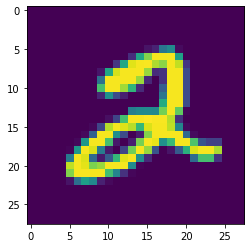

In [20]:
plt.imshow(xtrain[5])
print(ytrain[5])

In [10]:
# labels
np.unique(ytrain)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [11]:
# resize images to have a smaller dimension

xtrain = xtrain/255
xtest = xtest/255

In [12]:
xtrain[5]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

#**Neural Network**

In [16]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(36, activation='relu'),
                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')
])

In [17]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
model.fit(xtrain, ytrain, epochs = 15, batch_size = 30)

Epoch 1/15
2000/2000 [==============================] - 7s 3ms/step - loss: 0.2853 - accuracy: 0.9148
Epoch 2/15
2000/2000 [==============================] - 8s 4ms/step - loss: 0.1331 - accuracy: 0.9596
Epoch 3/15
2000/2000 [==============================] - 5s 3ms/step - loss: 0.1022 - accuracy: 0.9681
Epoch 4/15
2000/2000 [==============================] - 8s 4ms/step - loss: 0.0842 - accuracy: 0.9736
Epoch 5/15
2000/2000 [==============================] - 9s 5ms/step - loss: 0.0704 - accuracy: 0.9782
Epoch 6/15
2000/2000 [==============================] - 9s 5ms/step - loss: 0.0618 - accuracy: 0.9800
Epoch 7/15
2000/2000 [==============================] - 8s 4ms/step - loss: 0.0528 - accuracy: 0.9835
Epoch 8/15
2000/2000 [==============================] - 9s 4ms/step - loss: 0.0494 - accuracy: 0.9840
Epoch 9/15
2000/2000 [==============================] - 8s 4ms/step - loss: 0.0442 - accuracy: 0.9854
Epoch 10/15
2000/2000 [==============================] - 7s 3ms/step - loss: 0.036

#**Accuracy and prediction**

In [19]:
loss, accuracy = model.evaluate(xtest, ytest)
print('Test Loss:', loss, 'Test Acuracy:', accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1297 - accuracy: 0.9736
loss: 0.12969237565994263 accuracy: 0.9735999703407288


In [26]:
ypred = model.predict(xtest)
ypred

313/313 [==============================] - 1s 2ms/step


array([[7.3412832e-07, 2.6207013e-04, 5.3360443e-05, ..., 9.9999315e-01,
        9.9736644e-06, 2.0297797e-01],
       [1.3145550e-08, 9.0717137e-01, 9.9999928e-01, ..., 1.3727334e-01,
        2.4766608e-05, 4.6527263e-10],
       [8.9914096e-08, 9.9956560e-01, 3.2647703e-02, ..., 2.7361542e-01,
        3.8657631e-03, 2.5328336e-06],
       ...,
       [3.6663819e-12, 3.2503584e-07, 2.5208640e-06, ..., 1.1497298e-01,
        2.8944461e-07, 2.2262004e-03],
       [1.5237556e-07, 7.1964104e-13, 1.1017129e-12, ..., 5.5998932e-08,
        1.9513058e-02, 1.1498238e-05],
       [1.9278241e-06, 9.9809949e-10, 4.3555586e-11, ..., 6.2012034e-11,
        7.8724748e-05, 6.3899563e-10]], dtype=float32)

In [27]:
# get probability of class
class_labels = [np.argmax(y) for y in ypred]
class_labels

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 5,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 3,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 4,
 7,
 2,
 7,
 1,
 2,
 1,
 1,
 7,
 4,
 2,
 3,
 5,
 1,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 6,
 0,
 4,
 1,
 9,
 5,
 7,
 8,
 9,
 3,
 7,
 4,
 6,
 4,
 3,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 3,
 2,
 9,
 7,
 7,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 9,
 3,
 1,
 4,
 1,
 7,
 6,
 9,
 6,
 0,
 5,
 4,
 9,
 9,
 2,
 1,
 9,
 4,
 8,
 7,
 3,
 9,
 7,
 4,
 4,
 4,
 9,
 2,
 5,
 4,
 7,
 6,
 7,
 9,
 0,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 2,
 9,
 9,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 6,
 5,
 4,
 6,
 5,
 4,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 2,
 7,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 8,
 9,
 2,
 5,
 0,
 1,
 1,
 1,
 0,
 9,
 0,
 3,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 5,
 9,
 3,
 9,
 0,
 3,
 5,
 5,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 8,
 7,
 9,
 2,
 2,
 4,
 1,
 5,
 9,
 8,
 7,
 2,
 3,
 0,
 6,
 4,
 2,


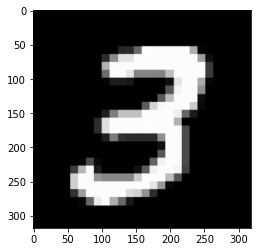

In [92]:
three = cv.imread("/content/three.png")
plt.imshow(three)

In [88]:
three.shape

(318, 318, 3)

In [66]:
def edit(img):
  img = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
  img = cv.resize(img, (28,28))
  img = img/255
  img = np.reshape(img, [1,28,28])
  return img

In [89]:
three2 = edit(three)
three2.shape

(1, 28, 28)

In [69]:
def pred(img):
  p = model.predict(img)
  return np.argmax(p)

In [90]:
def pred_system(img):
  img = edit(img)
  img = pred(img)
  return img

1/1 [==============================] - 0s 26ms/step
prediction: 3


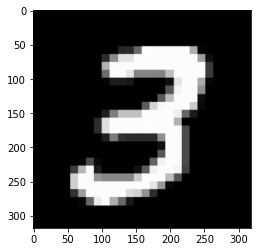

In [91]:
print('prediction:', pred_system(three))
plt.imshow(three)